In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import csv
import collections
plt.rcParams["figure.figsize"] = (10,6)


# **Read the Data**


### Read Omicron csv file with pandas read csv


In [124]:
df = pd.read_csv('data/22B_Final_Omicron.csv')
df.head() 

,Country,Date,RelativeTimeSpentInRetailAndRecreation,RelativeTimeSpentInGroceryAndPharmacy,RelativeTimeSpentInParks,RelativeTimeSpentInTransitStations,RelativeTimeSpentInWorkplaces,RelativeTimeSpentInResidents,IsoCode,Continent,NewCases,NewDeaths,PeopleVaccinated,PeopleFullyVaccinated,TotalBoosterVaccines,StringencyIndex,Population
0,Argentina,2021-12-01,2.0,31.0,-11.0,11,30.0,-1.0,ARG,South America,1881.0,8.0,37432360.0,30640101.0,2381772.0,42.59,45605823
1,Argentina,2021-12-02,2.0,29.0,-17.0,10,28.0,0.0,ARG,South America,2681.0,20.0,37511565.0,30807584.0,2531433.0,42.59,45605823
2,Argentina,2021-12-03,7.0,34.0,-16.0,12,27.0,-1.0,ARG,South America,2382.0,22.0,37581688.0,30942887.0,2641723.0,42.59,45605823
3,Argentina,2021-12-04,8.0,33.0,-18.0,17,10.0,1.0,ARG,South America,1690.0,4.0,37613425.0,31006159.0,2710490.0,42.59,45605823
4,Argentina,2021-12-05,-1.0,19.0,-16.0,6,1.0,3.0,ARG,South America,1294.0,3.0,37632525.0,31051503.0,2742527.0,42.59,45605823


### With the *info* method, it becomes easier to learn the rows and type of the data set. 

- Here we can collect our $Dtype$ float64 and int64 lines and do our operations

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8096 entries, 0 to 8095
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 8096 non-null   object 
 1   Date                                    8096 non-null   object 
 2   RelativeTimeSpentInRetailAndRecreation  7959 non-null   float64
 3   RelativeTimeSpentInGroceryAndPharmacy   7956 non-null   float64
 4   RelativeTimeSpentInParks                7956 non-null   float64
 5   RelativeTimeSpentInTransitStations      8096 non-null   int64  
 6   RelativeTimeSpentInWorkplaces           8068 non-null   float64
 7   RelativeTimeSpentInResidents            7956 non-null   float64
 8   IsoCode                                 8096 non-null   object 
 9   Continent                               8096 non-null   object 
 10  NewCases                                8066 non-null   floa

### The row with duplicate or null data value in the data set is checked.

In [126]:
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows >> ", duplicate_rows.shape)
print("Null values >> \n" + str(df.isnull() .sum()))


Number of duplicate rows >>  (0, 17)
Null values >> 
Country                                      0
Date                                         0
RelativeTimeSpentInRetailAndRecreation     137
RelativeTimeSpentInGroceryAndPharmacy      140
RelativeTimeSpentInParks                   140
RelativeTimeSpentInTransitStations           0
RelativeTimeSpentInWorkplaces               28
RelativeTimeSpentInResidents               140
IsoCode                                      0
Continent                                    0
NewCases                                    30
NewDeaths                                   32
PeopleVaccinated                          2317
PeopleFullyVaccinated                     2123
TotalBoosterVaccines                      2832
StringencyIndex                            462
Population                                   0
dtype: int64


### Statistical information about the data set is obtained.

- The low standard deviation in the time spent anywhere columns makes it easy to understand when plotting the data set.
- See that the number of $max$ deaths in one day is 4188.



In [127]:
df.describe()

,RelativeTimeSpentInRetailAndRecreation,RelativeTimeSpentInGroceryAndPharmacy,RelativeTimeSpentInParks,RelativeTimeSpentInTransitStations,RelativeTimeSpentInWorkplaces,RelativeTimeSpentInResidents,NewCases,NewDeaths,PeopleVaccinated,PeopleFullyVaccinated,TotalBoosterVaccines,StringencyIndex,Population
count,7959.000000,7956.00000,7956.000000,8096.000000,8068.000000,7956.000000,8.066000e+03,8064.000000,5.779000e+03,5.973000e+03,5.264000e+03,7634.000000,8.096000e+03
mean,-4.446915,19.84276,16.457642,-12.578557,-9.075235,4.990950,2.290788e+04,71.900794,2.096473e+07,1.895236e+07,1.136735e+07,42.124375,2.241935e+07
std,20.684672,30.81104,34.356794,24.312237,24.745030,4.784788,6.487431e+04,254.428851,4.283901e+07,3.660367e+07,1.841943e+07,16.536572,4.876831e+07
min,-94.000000,-93.00000,-72.000000,-93.000000,-91.000000,-13.000000,0.000000e+00,0.000000,2.576500e+04,2.512100e+04,1.534000e+03,2.780000,3.825400e+04
25%,-15.000000,6.00000,-8.000000,-26.000000,-19.000000,2.000000,4.532500e+02,1.000000,1.955840e+06,2.054944e+06,9.254772e+05,30.090000,3.979773e+06
50%,-6.000000,15.00000,10.000000,-16.000000,-9.000000,5.000000,3.690500e+03,13.000000,4.970124e+06,5.308217e+06,3.512274e+06,44.440000,6.896655e+06
75%,4.000000,28.00000,33.000000,-3.000000,1.000000,7.000000,1.737600e+04,49.000000,2.212816e+07,2.052449e+07,1.275704e+07,52.780000,1.912777e+07
max,139.000000,238.00000,256.000000,154.000000,161.000000,34.000000,1.383902e+06,4188.000000,2.581039e+08,2.201127e+08,1.012083e+08,79.170000,3.329151e+08


In [128]:
collections.Counter(df['Country'])


Counter({'Argentina': 156,
         'Austria': 156,
         'Australia': 156,
         'Aruba': 156,
         'Barbados': 156,
         'Belgium': 156,
         'Bulgaria': 156,
         'Bahrain': 156,
         'Switzerland': 156,
         'Chile': 156,
         'Costa Rica': 156,
         'Czechia': 156,
         'Germany': 156,
         'Denmark': 156,
         'Estonia': 156,
         'Spain': 156,
         'Finland': 156,
         'France': 156,
         'United Kingdom': 156,
         'Georgia': 156,
         'Greece': 156,
         'Hong Kong': 156,
         'Croatia': 156,
         'Hungary': 156,
         'Ireland': 156,
         'Israel': 156,
         'Italy': 156,
         'Jordan': 156,
         'South Korea': 156,
         'Lebanon': 156,
         'Liechtenstein': 140,
         'Lithuania': 156,
         'Luxembourg': 156,
         'Latvia': 156,
         'Mongolia': 156,
         'Malta': 156,
         'Mauritius': 156,
         'Netherlands': 156,
         'Norway': 15

# **The Main Sections**


### _Vaccine & Vaccine Providers_

We're going to look at how many countries people are making and how many vaccines they have in stock.


In [ ]:
df_vaccine_and_vaccine_providers = df[['Country', 'Date', 'NewCases', 'NewDeaths',
                                       'PeopleVaccinated', 'PeopleFullyVaccinated', 'TotalBoosterVaccines', 'Population']]


### _Death & Population_

We will examine the ratio of deaths in countries to the population and the time-dependent graph.


In [ ]:
df_death_and_population = df[['Country', 'Date',
                              'NewCases', 'NewDeaths', 'Population']]


### _Spent Time in Somewhere & New Cases_

Here we will evaluate where people spend their time and whether the increase or decrease in the number of cases is related to this.


In [129]:
df_spent_time_and_new_cases = df[['Country', 'Date', 'NewCases', 'RelativeTimeSpentInRetailAndRecreation', 'RelativeTimeSpentInGroceryAndPharmacy',
                                  'RelativeTimeSpentInParks', 'RelativeTimeSpentInTransitStations', 'RelativeTimeSpentInWorkplaces', 'RelativeTimeSpentInResidents']]


#  **Country Based Review**


### _Case Argentine_


C:\Users\alper\AppData\Local\Temp\ipykernel_5188\904942008.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vaccine_and_vaccine_providers_country.drop(


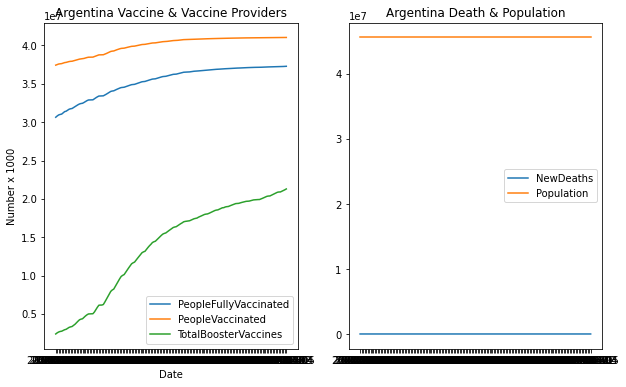

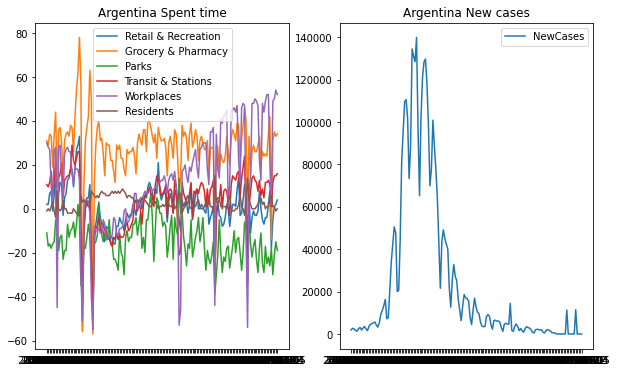

In [130]:
df_vaccine_and_vaccine_providers_country = df_vaccine_and_vaccine_providers.loc[
    df_vaccine_and_vaccine_providers['Country'] == 'Argentina']

df_vaccine_and_vaccine_providers_country.set_index('Date', inplace=True)

df_vaccine_and_vaccine_providers_country.drop(
    ['Country', 'Population'], axis=1, inplace=True)

# Death & Population
df_death_and_population_country = df_death_and_population.loc[
    df_death_and_population['Country'] == 'Argentina']

df_death_and_population_country.set_index('Date', inplace=True)

# Spent time & New cases
df_spent_time_and_new_cases_country = df_spent_time_and_new_cases.loc[
    df_spent_time_and_new_cases['Country'] == 'Argentina']
df_spent_time_and_new_cases_country.set_index('Date', inplace=True)

plt.figure()
plt.subplot(1, 2, 1)
plt.plot(df_vaccine_and_vaccine_providers_country.index,
         df_vaccine_and_vaccine_providers_country.PeopleFullyVaccinated)
plt.plot(df_vaccine_and_vaccine_providers_country.index,
         df_vaccine_and_vaccine_providers_country.PeopleVaccinated)
plt.plot(df_vaccine_and_vaccine_providers_country.index,
         df_vaccine_and_vaccine_providers_country.TotalBoosterVaccines)
plt.legend(['PeopleFullyVaccinated', 'PeopleVaccinated', 'TotalBoosterVaccines'])
plt.xlabel('Date')
plt.ylabel('Number x 1000')
plt.title('Argentina Vaccine & Vaccine Providers')

plt.subplot(1, 2, 2)
plt.plot(df_death_and_population_country.index,
         df_death_and_population_country.NewDeaths)
plt.plot(df_death_and_population_country.index,
         df_death_and_population_country.Population)
plt.title('Argentina Death & Population')
plt.legend(['NewDeaths', 'Population'])


plt.figure()
plt.subplot(1, 2, 1)
plt.plot(df_spent_time_and_new_cases_country.index,
         df_spent_time_and_new_cases_country.RelativeTimeSpentInRetailAndRecreation)
plt.plot(df_spent_time_and_new_cases_country.index,
         df_spent_time_and_new_cases_country.RelativeTimeSpentInGroceryAndPharmacy)
plt.plot(df_spent_time_and_new_cases_country.index,
         df_spent_time_and_new_cases_country.RelativeTimeSpentInParks)
plt.plot(df_spent_time_and_new_cases_country.index,
         df_spent_time_and_new_cases_country.RelativeTimeSpentInTransitStations)
plt.plot(df_spent_time_and_new_cases_country.index,
         df_spent_time_and_new_cases_country.RelativeTimeSpentInWorkplaces)
plt.plot(df_spent_time_and_new_cases_country.index,
         df_spent_time_and_new_cases_country.RelativeTimeSpentInResidents)
plt.title('Argentina Spent time')
plt.legend(['Retail & Recreation', 'Grocery & Pharmacy', 'Parks',
           'Transit & Stations', 'Workplaces', 'Residents'])

plt.subplot(1, 2, 2)
plt.plot(df_spent_time_and_new_cases_country.index,
         df_spent_time_and_new_cases_country.NewCases)
plt.title('Argentina New cases')
plt.legend(['NewCases'])


### _Case Belgium_


C:\Users\alper\AppData\Local\Temp\ipykernel_5188\2594236467.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vaccine_and_vaccine_providers_country.drop(


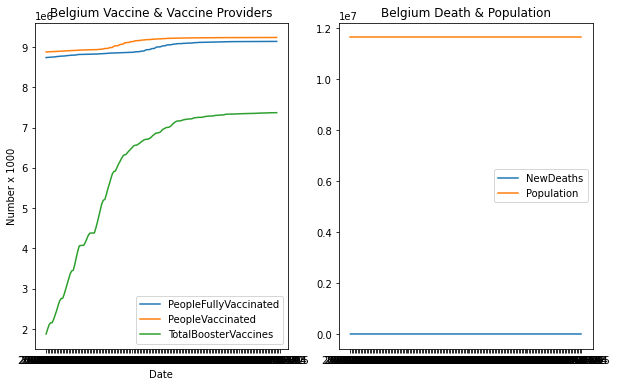

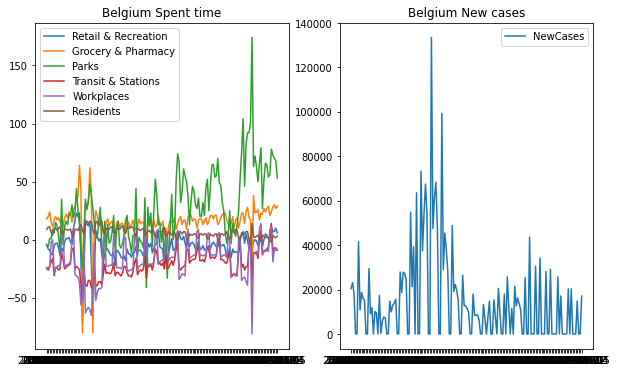

In [131]:
df_vaccine_and_vaccine_providers_country = df_vaccine_and_vaccine_providers.loc[
    df_vaccine_and_vaccine_providers['Country'] == 'Belgium']

df_vaccine_and_vaccine_providers_country.set_index('Date', inplace=True)

df_vaccine_and_vaccine_providers_country.drop(
    ['Country', 'Population'], axis=1, inplace=True)

# Death & Population
df_death_and_population_country = df_death_and_population.loc[
    df_death_and_population['Country'] == 'Belgium']

df_death_and_population_country.set_index('Date', inplace=True)

# Spent time & New cases
df_spent_time_and_new_cases_country = df_spent_time_and_new_cases.loc[
    df_spent_time_and_new_cases['Country'] == 'Belgium']
df_spent_time_and_new_cases_country.set_index('Date', inplace=True)

plt.figure()
plt.subplot(1, 2, 1)
plt.plot(df_vaccine_and_vaccine_providers_country.index,
         df_vaccine_and_vaccine_providers_country.PeopleFullyVaccinated)
plt.plot(df_vaccine_and_vaccine_providers_country.index,
         df_vaccine_and_vaccine_providers_country.PeopleVaccinated)
plt.plot(df_vaccine_and_vaccine_providers_country.index,
         df_vaccine_and_vaccine_providers_country.TotalBoosterVaccines)
plt.legend(['PeopleFullyVaccinated', 'PeopleVaccinated', 'TotalBoosterVaccines'])
plt.xlabel('Date')
plt.ylabel('Number x 1000')
plt.title('Belgium Vaccine & Vaccine Providers')

plt.subplot(1, 2, 2)
plt.plot(df_death_and_population_country.index,
         df_death_and_population_country.NewDeaths)
plt.plot(df_death_and_population_country.index,
         df_death_and_population_country.Population)
plt.title('Belgium Death & Population')
plt.legend(['NewDeaths', 'Population'])


plt.figure()
plt.subplot(1, 2, 1)
plt.plot(df_spent_time_and_new_cases_country.index,
         df_spent_time_and_new_cases_country.RelativeTimeSpentInRetailAndRecreation)
plt.plot(df_spent_time_and_new_cases_country.index,
         df_spent_time_and_new_cases_country.RelativeTimeSpentInGroceryAndPharmacy)
plt.plot(df_spent_time_and_new_cases_country.index,
         df_spent_time_and_new_cases_country.RelativeTimeSpentInParks)
plt.plot(df_spent_time_and_new_cases_country.index,
         df_spent_time_and_new_cases_country.RelativeTimeSpentInTransitStations)
plt.plot(df_spent_time_and_new_cases_country.index,
         df_spent_time_and_new_cases_country.RelativeTimeSpentInWorkplaces)
plt.plot(df_spent_time_and_new_cases_country.index,
         df_spent_time_and_new_cases_country.RelativeTimeSpentInResidents)
plt.title('Belgium Spent time')
plt.legend(['Retail & Recreation', 'Grocery & Pharmacy', 'Parks',
           'Transit & Stations', 'Workplaces', 'Residents'])

plt.subplot(1, 2, 2)
plt.plot(df_spent_time_and_new_cases_country.index,
         df_spent_time_and_new_cases_country.NewCases)
plt.title('Belgium New cases')
plt.legend(['NewCases'])


### _Case Switzerland_


C:\Users\alper\AppData\Local\Temp\ipykernel_5188\611793620.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vaccine_and_vaccine_providers_country.drop(


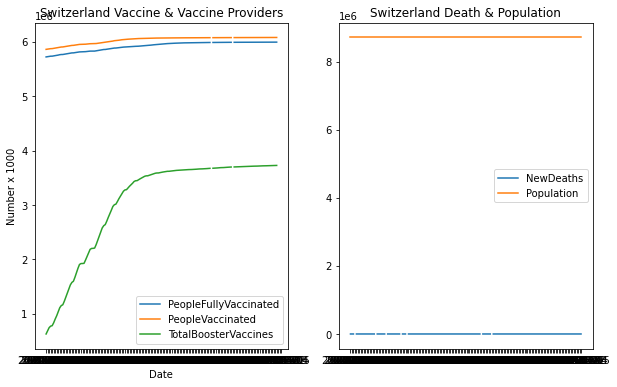

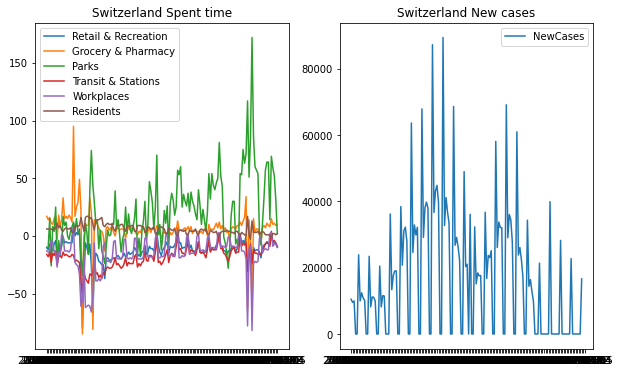

In [132]:
df_vaccine_and_vaccine_providers_country = df_vaccine_and_vaccine_providers.loc[
    df_vaccine_and_vaccine_providers['Country'] == 'Switzerland']

df_vaccine_and_vaccine_providers_country.set_index('Date', inplace=True)

df_vaccine_and_vaccine_providers_country.drop(
    ['Country', 'Population'], axis=1, inplace=True)

# Death & Population
df_death_and_population_country = df_death_and_population.loc[
    df_death_and_population['Country'] == 'Switzerland']

df_death_and_population_country.set_index('Date', inplace=True)

# Spent time & New cases
df_spent_time_and_new_cases_country = df_spent_time_and_new_cases.loc[
    df_spent_time_and_new_cases['Country'] == 'Switzerland']
df_spent_time_and_new_cases_country.set_index('Date', inplace=True)

plt.figure()
plt.subplot(1, 2, 1)
plt.plot(df_vaccine_and_vaccine_providers_country.index,
         df_vaccine_and_vaccine_providers_country.PeopleFullyVaccinated)
plt.plot(df_vaccine_and_vaccine_providers_country.index,
         df_vaccine_and_vaccine_providers_country.PeopleVaccinated)
plt.plot(df_vaccine_and_vaccine_providers_country.index,
         df_vaccine_and_vaccine_providers_country.TotalBoosterVaccines)
plt.legend(['PeopleFullyVaccinated', 'PeopleVaccinated', 'TotalBoosterVaccines'])
plt.xlabel('Date')
plt.ylabel('Number x 1000')
plt.title('Switzerland Vaccine & Vaccine Providers')

plt.subplot(1, 2, 2)
plt.plot(df_death_and_population_country.index,
         df_death_and_population_country.NewDeaths)
plt.plot(df_death_and_population_country.index,
         df_death_and_population_country.Population)
plt.title('Switzerland Death & Population')
plt.legend(['NewDeaths', 'Population'])


plt.figure()
plt.subplot(1, 2, 1)
plt.plot(df_spent_time_and_new_cases_country.index,
         df_spent_time_and_new_cases_country.RelativeTimeSpentInRetailAndRecreation)
plt.plot(df_spent_time_and_new_cases_country.index,
         df_spent_time_and_new_cases_country.RelativeTimeSpentInGroceryAndPharmacy)
plt.plot(df_spent_time_and_new_cases_country.index,
         df_spent_time_and_new_cases_country.RelativeTimeSpentInParks)
plt.plot(df_spent_time_and_new_cases_country.index,
         df_spent_time_and_new_cases_country.RelativeTimeSpentInTransitStations)
plt.plot(df_spent_time_and_new_cases_country.index,
         df_spent_time_and_new_cases_country.RelativeTimeSpentInWorkplaces)
plt.plot(df_spent_time_and_new_cases_country.index,
         df_spent_time_and_new_cases_country.RelativeTimeSpentInResidents)
plt.title('Switzerland Spent time')
plt.legend(['Retail & Recreation', 'Grocery & Pharmacy', 'Parks',
           'Transit & Stations', 'Workplaces', 'Residents'])

plt.subplot(1, 2, 2)
plt.plot(df_spent_time_and_new_cases_country.index,
         df_spent_time_and_new_cases_country.NewCases)
plt.title('Switzerland New cases')
plt.legend(['NewCases'])


### _Case Turkey_


C:\Users\alper\AppData\Local\Temp\ipykernel_5188\2319414676.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vaccine_and_vaccine_providers_country.drop(


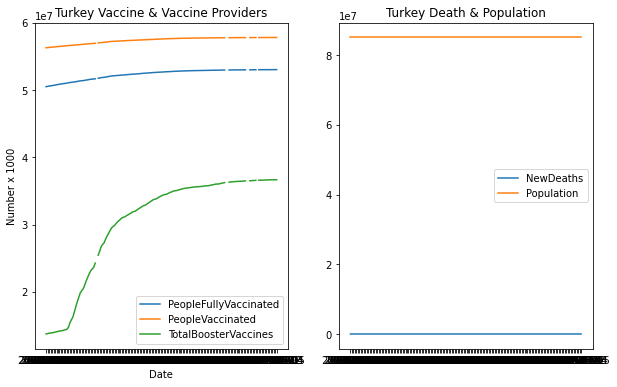

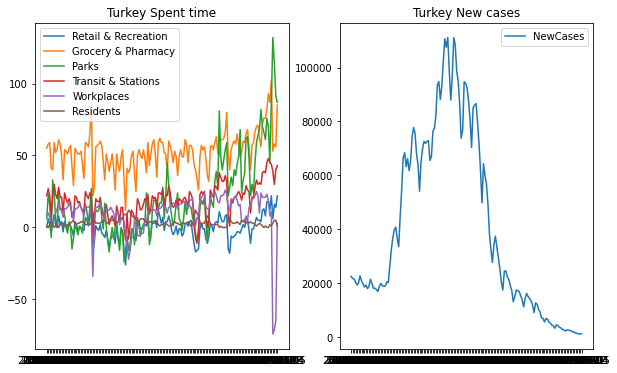

In [133]:
# Vaccine & Vaccine Providers
df_vaccine_and_vaccine_providers_country = df_vaccine_and_vaccine_providers.loc[
    df_vaccine_and_vaccine_providers['Country'] == 'Turkey']

df_vaccine_and_vaccine_providers_country.set_index('Date', inplace=True)

df_vaccine_and_vaccine_providers_country.drop(
    ['Country', 'Population'], axis=1, inplace=True)

# Death & Population
df_death_and_population_country = df_death_and_population.loc[
    df_death_and_population['Country'] == 'Turkey']

df_death_and_population_country.set_index('Date', inplace=True)

# Spent time & New cases
df_spent_time_and_new_cases_country = df_spent_time_and_new_cases.loc[
    df_spent_time_and_new_cases['Country'] == 'Turkey']
df_spent_time_and_new_cases_country.set_index('Date', inplace=True)

plt.figure()
plt.subplot(1, 2, 1)
plt.plot(df_vaccine_and_vaccine_providers_country.index,
         df_vaccine_and_vaccine_providers_country.PeopleFullyVaccinated)
plt.plot(df_vaccine_and_vaccine_providers_country.index,
         df_vaccine_and_vaccine_providers_country.PeopleVaccinated)
plt.plot(df_vaccine_and_vaccine_providers_country.index,
         df_vaccine_and_vaccine_providers_country.TotalBoosterVaccines)
plt.legend(['PeopleFullyVaccinated', 'PeopleVaccinated', 'TotalBoosterVaccines'])
plt.xlabel('Date')
plt.ylabel('Number x 1000')
plt.title('Turkey Vaccine & Vaccine Providers')

plt.subplot(1, 2, 2)
plt.plot(df_death_and_population_country.index,
         df_death_and_population_country.NewDeaths)
plt.plot(df_death_and_population_country.index,
         df_death_and_population_country.Population)
plt.title('Turkey Death & Population')
plt.legend(['NewDeaths', 'Population'])


plt.figure()
plt.subplot(1, 2, 1)
plt.plot(df_spent_time_and_new_cases_country.index,
         df_spent_time_and_new_cases_country.RelativeTimeSpentInRetailAndRecreation)
plt.plot(df_spent_time_and_new_cases_country.index,
         df_spent_time_and_new_cases_country.RelativeTimeSpentInGroceryAndPharmacy)
plt.plot(df_spent_time_and_new_cases_country.index,
         df_spent_time_and_new_cases_country.RelativeTimeSpentInParks)
plt.plot(df_spent_time_and_new_cases_country.index,
         df_spent_time_and_new_cases_country.RelativeTimeSpentInTransitStations)
plt.plot(df_spent_time_and_new_cases_country.index,
         df_spent_time_and_new_cases_country.RelativeTimeSpentInWorkplaces)
plt.plot(df_spent_time_and_new_cases_country.index,
         df_spent_time_and_new_cases_country.RelativeTimeSpentInResidents)
plt.title('Turkey Spent time')
plt.legend(['Retail & Recreation', 'Grocery & Pharmacy', 'Parks',
           'Transit & Stations', 'Workplaces', 'Residents'])

plt.subplot(1, 2, 2)
plt.plot(df_spent_time_and_new_cases_country.index,
         df_spent_time_and_new_cases_country.NewCases)
plt.title('Turkey New cases')
plt.legend(['NewCases'])
